## Inicializando Librerías

In [3]:
import sklearn
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt
import pandas as pd

In [4]:
df = pd.read_csv('datos_banco.csv',encoding = "ISO-8859-1")

In [5]:
df.head()

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0


In [6]:
df.shape

(1719, 14)

In [7]:
df.groupby('person_degree_type_desc').size()

person_degree_type_desc
Carrera TÃÂ©cnica    432
Carrera TÌÄå©cnica    192
Postgrado              65
Primaria                3
Secundaria            220
Universitaria         807
dtype: int64

In [8]:
df.describe()

,target,var_employment_time_in_months,approved_term,var_net_income,default_request_term,default_request_amount
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.0
mean,0.295521,33.979592,6.464805,2693.545884,0.507853,0.0
std,0.456409,26.889423,3.009842,1825.694773,0.500084,0.0
min,0.000000,-1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,11.000000,6.000000,1750.000000,0.000000,0.0
50%,0.000000,26.000000,6.000000,2373.758333,1.000000,0.0
75%,1.000000,61.000000,6.000000,3075.133333,1.000000,0.0
max,1.000000,87.000000,12.000000,28587.000000,1.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002355E8E8688>,
      dtype=object)

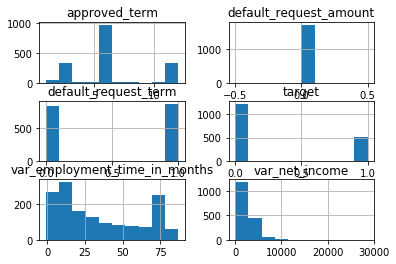

In [9]:
df.hist()

In [13]:
x_df = df.drop(columns= "var_net_income")
y_df = df["var_net_income"]

print("shape of x_df = ", x_df.shape)
print("shape of y_df = ", y_df.shape)


shape of x_df =  (1719, 13)
shape of y_df =  (1719,)


### Encontrando Valores Faltantes


In [16]:
num_vars = x_df.select_dtypes(include=["int64","float64"]).columns

In [17]:
num_vars 

Index(['target', 'var_employment_time_in_months', 'approved_term',
       'default_request_term', 'default_request_amount'],
      dtype='object')

In [18]:
x_df[num_vars].isnull().sum()

target                             0
var_employment_time_in_months    200
approved_term                      0
default_request_term               0
default_request_amount             0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy = "mean")

In [21]:
imputer_mean.fit(x_df[num_vars])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [23]:
imputer_mean.statistics_

array([ 0.29552065, 33.97959184,  6.46480512,  0.5078534 ,  0.        ])

In [24]:
imputer_mean.transform(x_df[num_vars])

array([[ 1.,  9.,  6.,  1.,  0.],
       [ 1., 50., 12.,  0.,  0.],
       [ 0., 64.,  3.,  0.,  0.],
       ...,
       [ 0., 56.,  6.,  0.,  0.],
       [ 0., 80.,  3.,  1.,  0.],
       [ 0., 12.,  3.,  0.,  0.]])

In [25]:
x_df[num_vars] = imputer_mean.transform(x_df[num_vars])

In [26]:
x_df[num_vars].isnull().sum()

target                           0
var_employment_time_in_months    0
approved_term                    0
default_request_term             0
default_request_amount           0
dtype: int64